In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import fisher_score
%matplotlib inline

#data = pd.read_csv('dataset/roi_95img_9_roi_glrlm_32p.csv')
train = pd.read_csv('dataset/train.csv')

X_train = train.copy()
y_train = X_train.pop('target')

std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train), columns=X_train.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

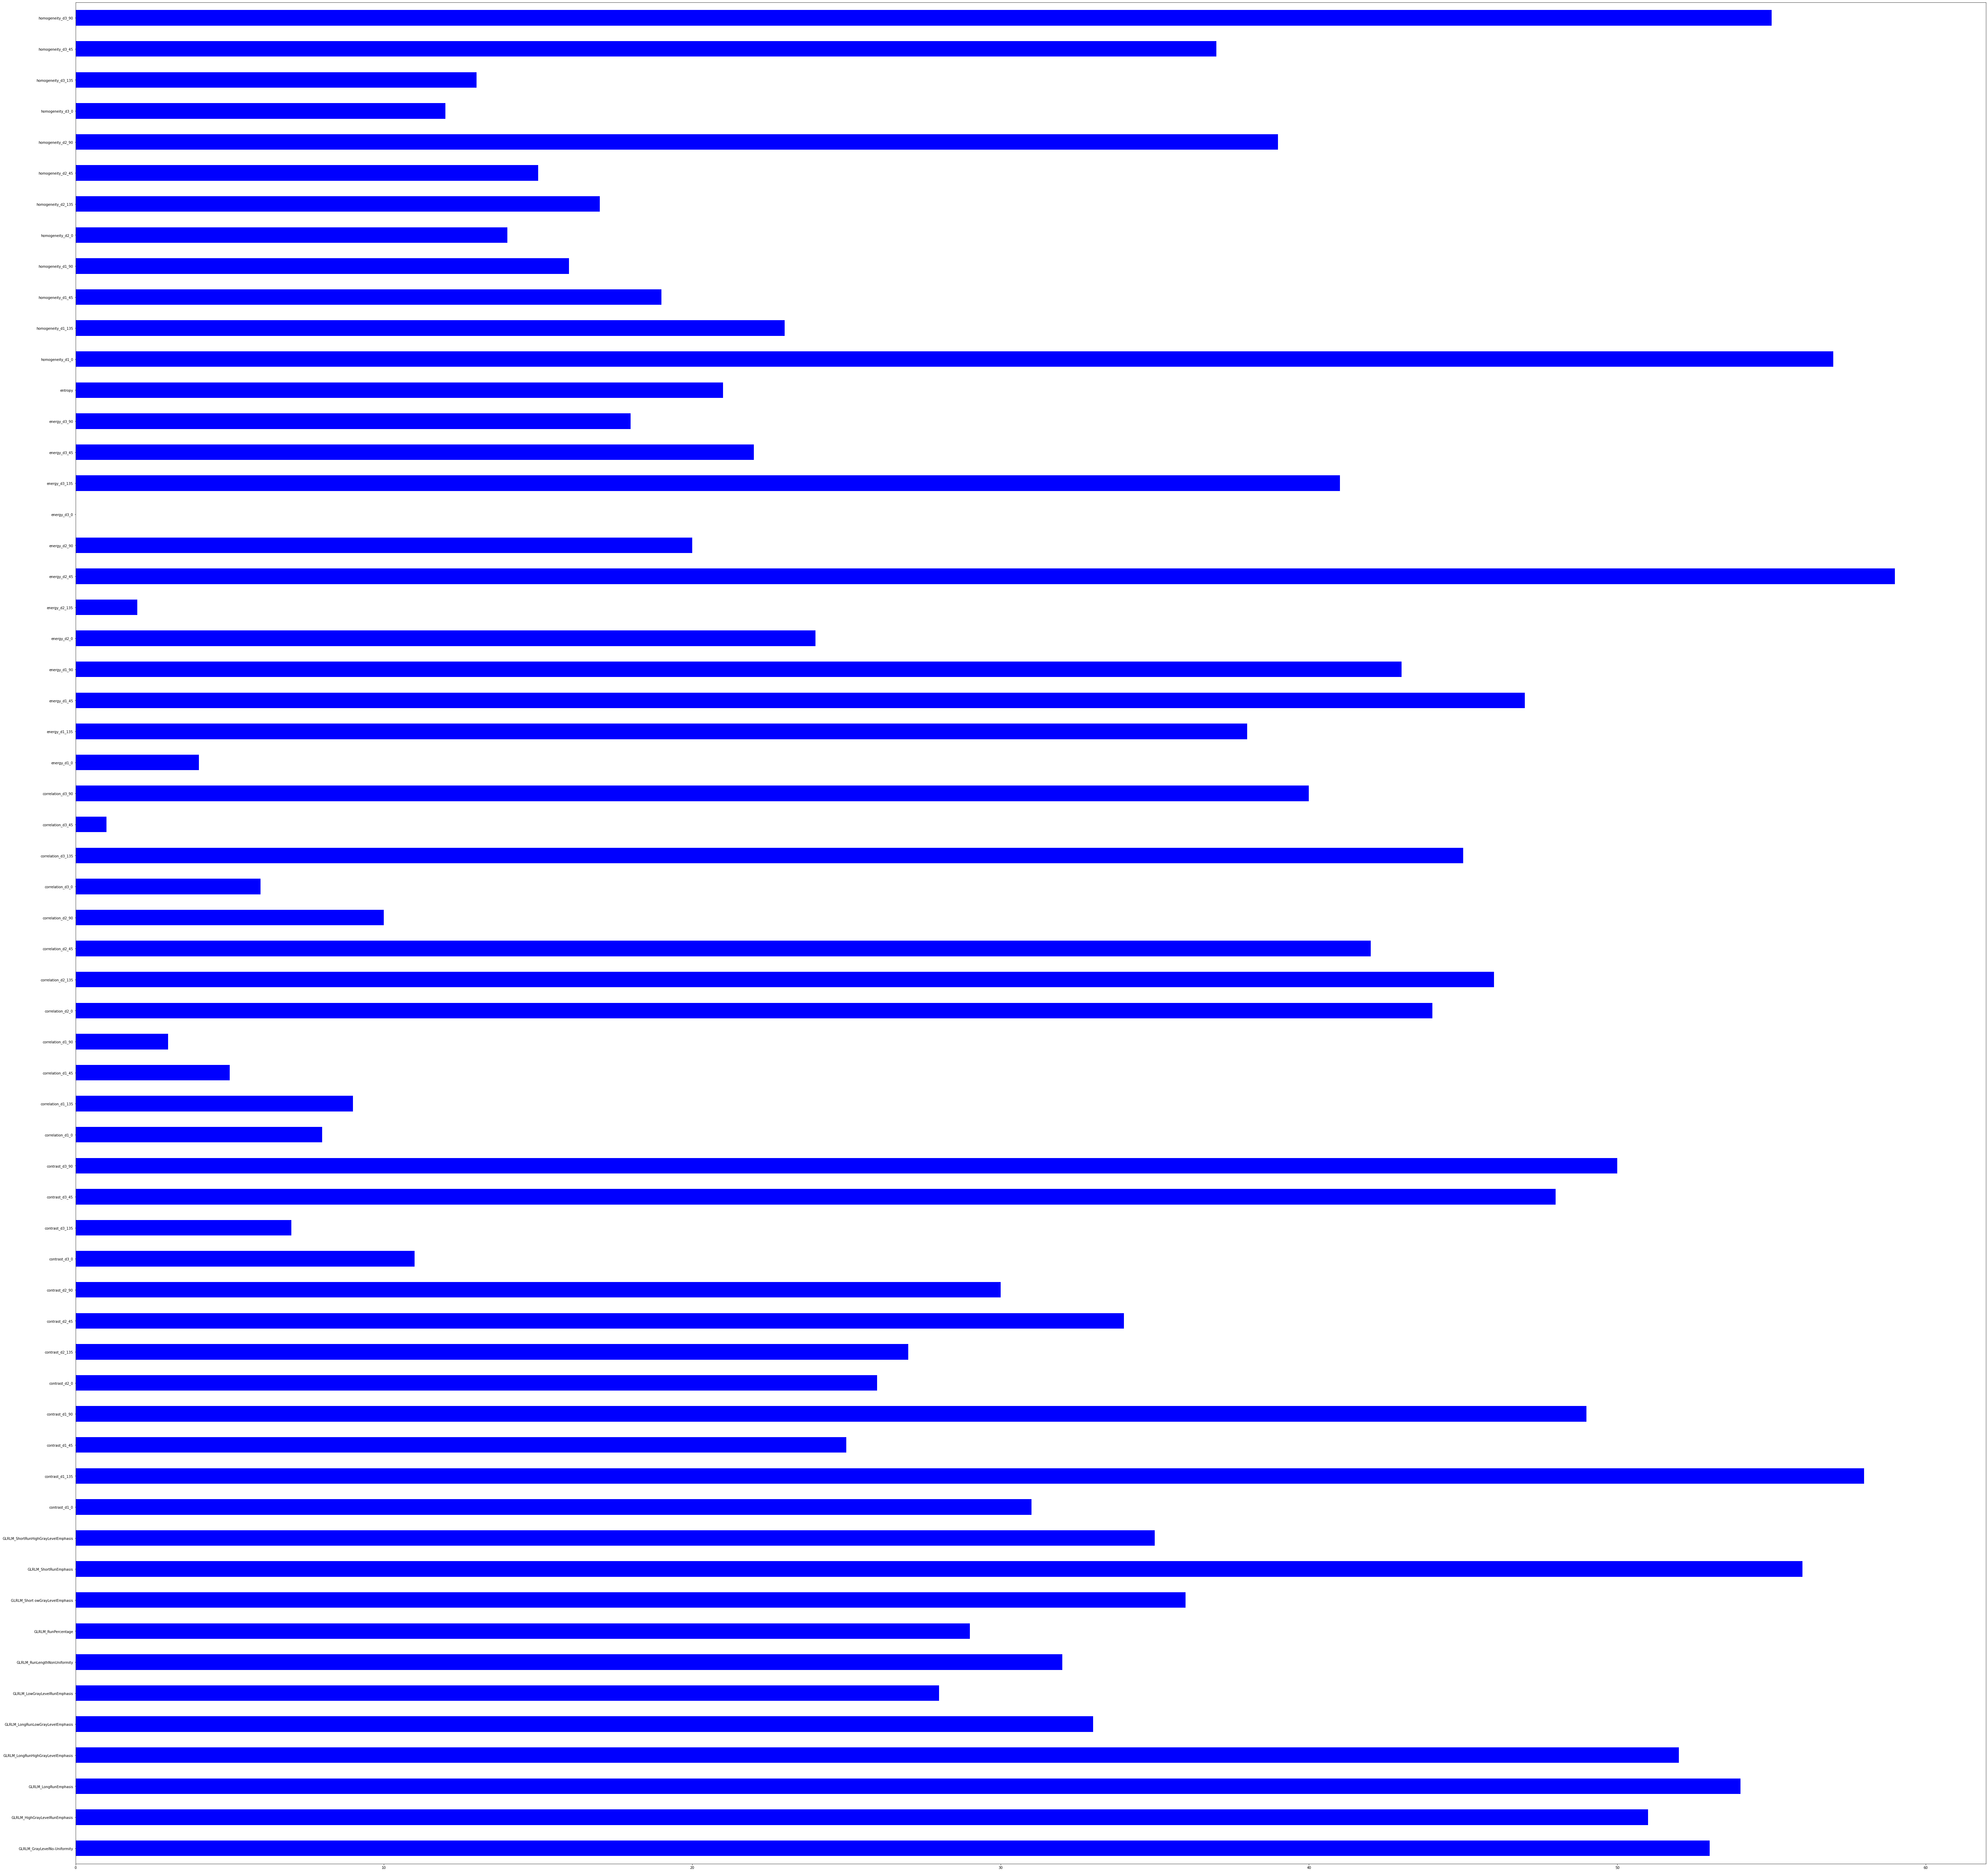

In [31]:
X = X_train.to_numpy()
Y = y_train.to_numpy()
ranks = fisher_score.fisher_score(X,Y)
plt.figure(figsize = (100,100))
feat_importances = pd.Series(ranks,X_train.columns[0:len(X_train.columns)])
feat_importances.plot(kind='barh', color = 'blue')
plt.show

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.55465009 0.14550973]


<AxesSubplot:>

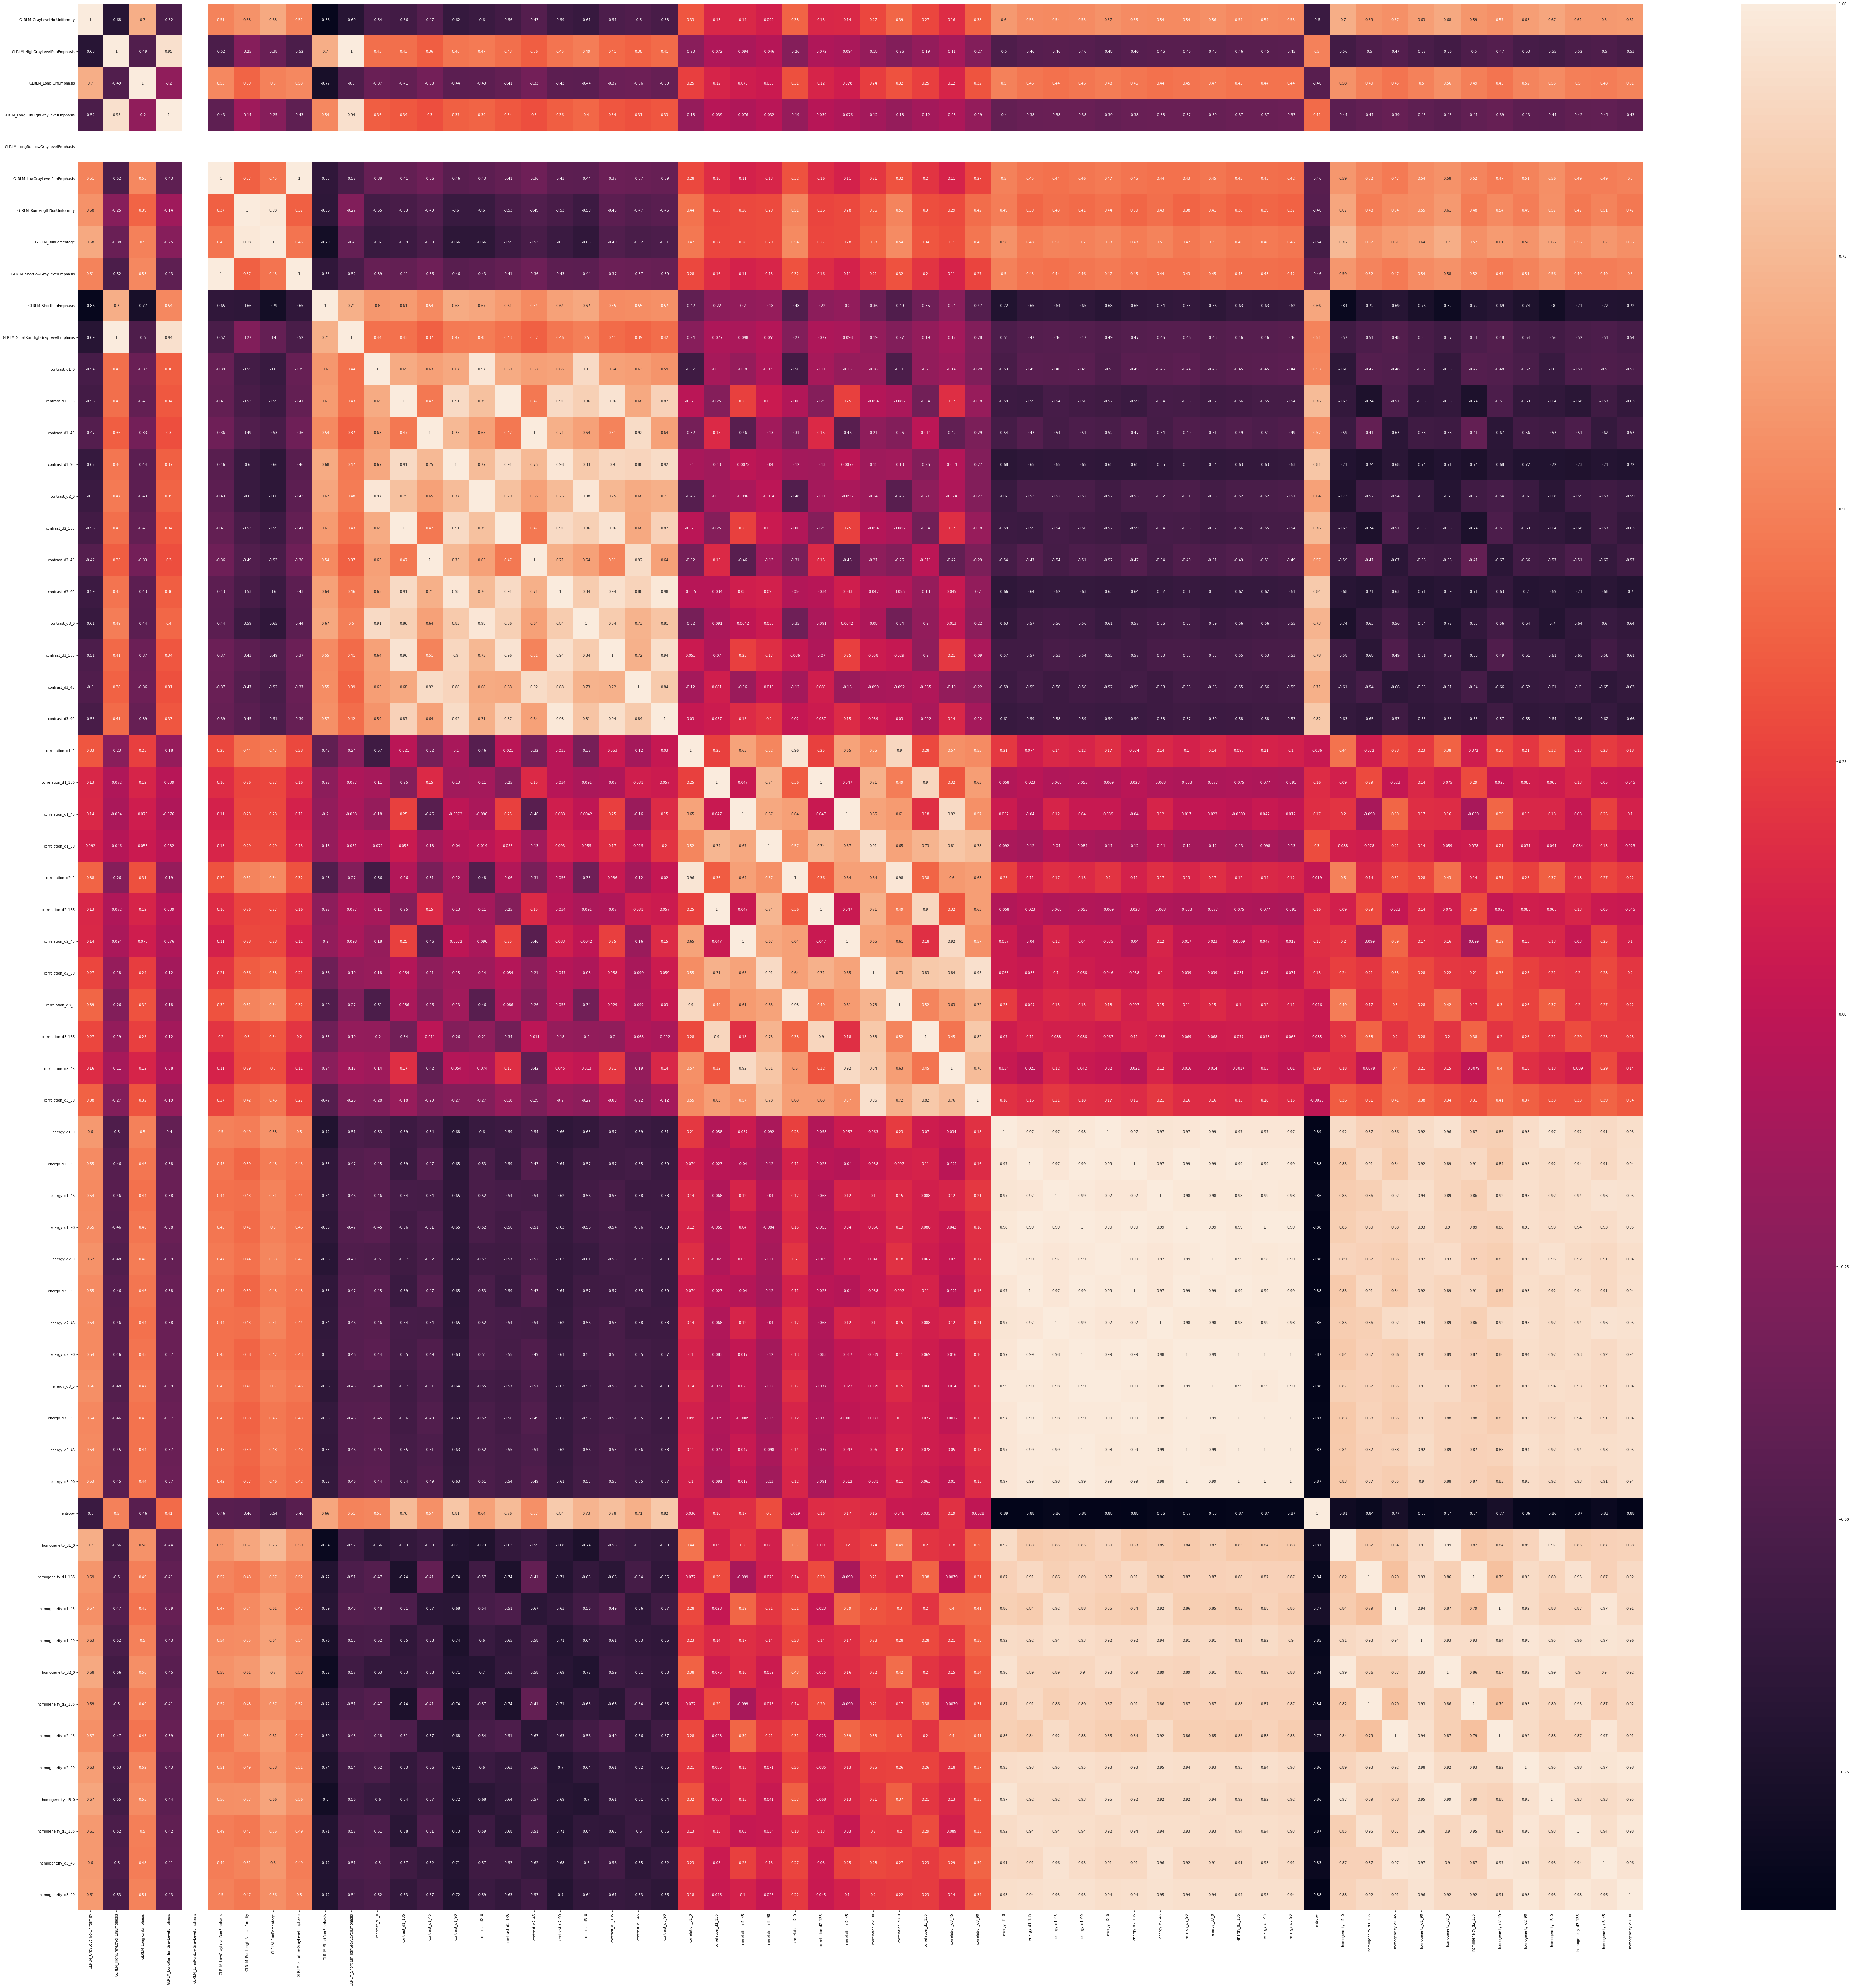

In [33]:
cor = X_train.corr()

plt.figure(figsize = (100,100))
sns.heatmap(cor, annot = True)